In [3]:
vancouverrental <- read.csv("train.csv")


In [4]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Loading required package: ggplot2

Loading required package: lattice



Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2612 1.9386 1.7497 1.59551 1.50384 1.44487 1.19269
Proportion of Variance 0.1763 0.1296 0.1056 0.08778 0.07798 0.07199 0.04905
Cumulative Proportion  0.1763 0.3059 0.4115 0.49924 0.57723 0.64921 0.69827
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.1385 1.05481 0.94463 0.81931 0.78828 0.76665 0.75322
Proportion of Variance 0.0447 0.03837 0.03077 0.02315 0.02143 0.02027 0.01956
Cumulative Proportion  0.7430 0.78133 0.81210 0.83525 0.85667 0.87694 0.89650
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     0.70316 0.66232 0.58316 0.55501 0.54592 0.4966 0.46147
Proportion of Variance 0.01705 0.01513 0.01173 0.01062 0.01028 0.0085 0.00734
Cumulative Proportion  0.91355 0.92868 0.94041 0.95103 0.96130 0.9698 0.97715
                          PC22    PC23    PC24

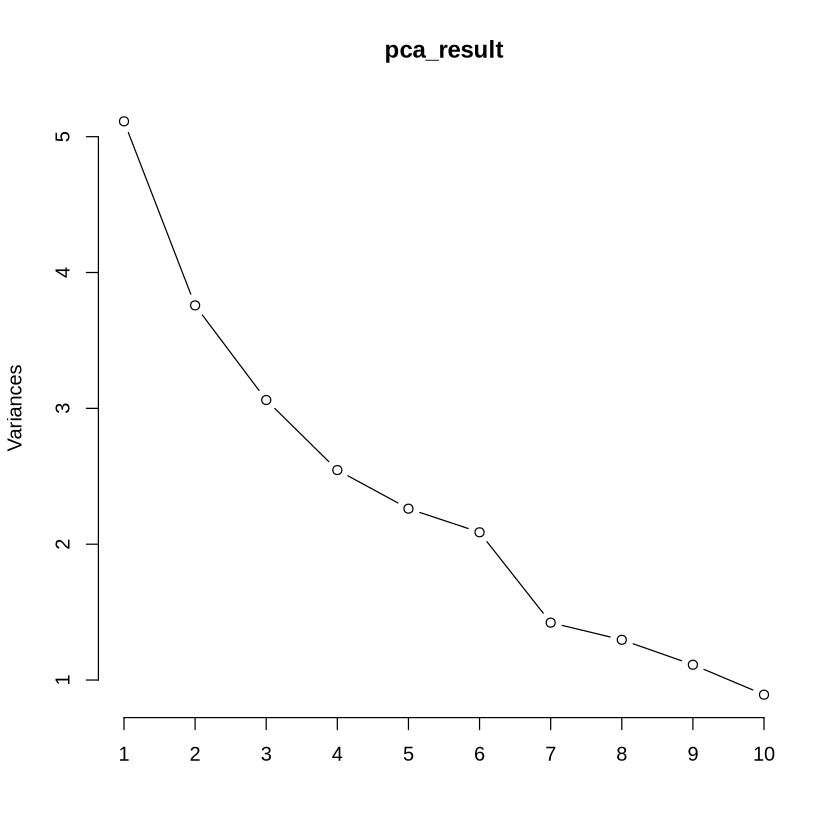

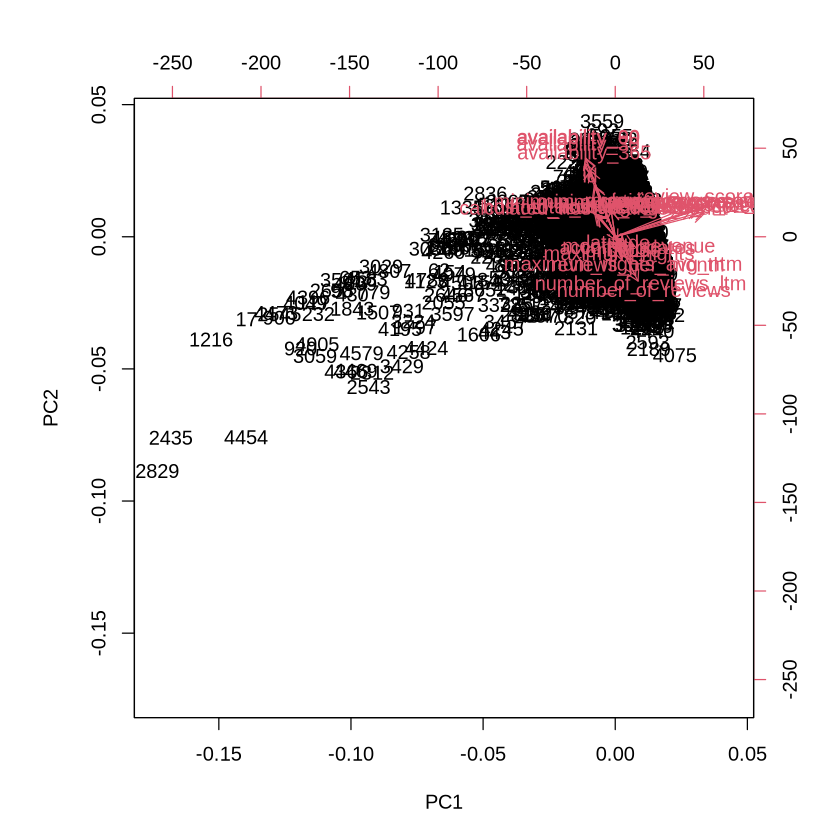

In [5]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(caret)

# Preprocess data: remove non-numeric columns and handle missing values
vancouverrental_numeric <- vancouverrental %>%
  select_if(is.numeric) %>%
  mutate_all(~ ifelse(is.na(.), median(., na.rm = TRUE), .))

# Standardize the data
vancouverrental_scaled <- scale(vancouverrental_numeric)

# Perform PCA
pca_result <- prcomp(vancouverrental_scaled, center = TRUE, scale. = TRUE)

# View PCA summary
summary(pca_result)

# Scree plot to view variance explained
plot(pca_result, type = "l")

# Biplot for visualization
biplot(pca_result)


In [6]:
# Extract loadings for PC1 to PC7
loadings_pc1_to_pc7 <- loadings[, 1:7]  # Extract loadings for PC1 through PC7

# Loop through each principal component (PC1 to PC7) and display sorted loadings
for (i in 1:7) {
  # Sort variables by absolute loading value for the current component
  top_pc <- loadings_pc1_to_pc7[order(abs(loadings_pc1_to_pc7[, i]), decreasing = TRUE), i]
  
  # Display sorted loadings for the current principal component
  cat("Top variables contributing to PC", i, ":\n")
  print(top_pc)
  cat("\n")  # Add a line break for readability
}


ERROR: Error in loadings[, 1:7]: object of type 'closure' is not subsettable


In [11]:
vancouverrental.lm <- lm(monthly_revenue ~ review_scores_rating + availability_90 + reviews_per_month + host_listings_count + availability_60 + availability_30 + number_of_reviews + number_of_reviews_ltm, data = vancouverrental)

In [12]:
vancouverrental_test <- read.csv("test.csv", colClasses = c("id" = "character"))

In [13]:
predicted_revenue <- predict(vancouverrental.lm, newdata = vancouverrental_test)

In [14]:
final <- vancouverrental_test
final$predictions <- predicted_revenue

In [15]:
pearl <- final

In [16]:
dim(final)


[1] 1339   44

In [17]:
pearl <- final[, c(1, 44)]

In [18]:
head(pearl)

,id,predictions
,<chr>,<dbl>
1,4465400,2026.844
2,608629349064811166,NA
3,981894508939312892,2171.311
4,52014961,1891.825
5,836285112356489303,1820.460
6,729730483477613494,2074.398


In [19]:
write.csv(pearl, "pearl.csv", row.names = FALSE)

In [20]:
pearl[is.na(pearl)] <- 0

In [21]:
head(pearl)

,id,predictions
,<chr>,<dbl>
1,4465400,2026.844
2,608629349064811166,0.000
3,981894508939312892,2171.311
4,52014961,1891.825
5,836285112356489303,1820.460
6,729730483477613494,2074.398


In [22]:
write.csv(pearl, "hi.csv", row.names = FALSE)

In [23]:
vancouverrental_sample <- read.csv("sample_submissions.csv")

Warning message in file(file, "rt"):
“cannot open file 'sample_submissions.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [24]:
peedeepie <- pearl[match(vancouverrental_sample$id, vancouverrental_sample$id), ]

ERROR: Error in eval(expr, envir, enclos): object 'vancouverrental_sample' not found


In [25]:
missing_ids <- setdiff(vancouverrental_sample$id, peedeepie$id)
extra_ids <- setdiff(peedeepie$id, vancouverrental_sample$id)

print(missing_ids)
print(extra_ids)

ERROR: Error in eval(expr, envir, enclos): object 'vancouverrental_sample' not found


In [26]:
pearl$id <- as.factor(pearl$id)

In [27]:
write.csv(pearl, "bye.csv", row.names = FALSE)

In [28]:
write.csv(pearl, "lmao.csv", row.names = FALSE)

In [29]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib:
  cannot open URL 'https://mirror.rcg.sfu.ca/mirror/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘glmnet’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [30]:
# Scale the predictors
x <- scale(as.matrix(vancouverrental[, c("review_scores_rating", "availability_90", "reviews_per_month",
                                         "host_listings_count", "availability_60", "availability_30",
                                         "number_of_reviews", "number_of_reviews_ltm")]))

# Define the target variable
y <- vancouverrental$monthly_revenue


In [31]:
# Perform cross-validated Ridge Regression
ridge_model <- cv.glmnet(x, y, alpha = 0, lambda = 10^seq(10, -2, length = 100))

# Print the best lambda (regularization strength)
best_lambda <- ridge_model$lambda.min
print(paste("Best Lambda:", best_lambda))


ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : x has missing values; consider using makeX() to impute them


In [32]:
missing_summary <- colSums(is.na(x))
print(missing_summary)

 review_scores_rating       availability_90     reviews_per_month 
                  900                     0                   906 
  host_listings_count       availability_60       availability_30 
                    0                     0                     0 
    number_of_reviews number_of_reviews_ltm 
                    0                     0 


In [33]:
rows_with_na <- sum(rowSums(is.na(x)) > 0)
print(paste("Number of rows with missing values:", rows_with_na))

[1] "Number of rows with missing values: 906"


In [34]:
# Remove rows with NA values
x_clean <- na.omit(x)
y_clean <- y[!rowSums(is.na(x)) > 0]


In [36]:
# Refit Ridge Regression with cleaned/imputed data
ridge_model <- cv.glmnet(x_clean, y, alpha = 0, lambda = 10^seq(10, -2, length = 100))

# Optimal lambda
best_lambda <- ridge_model$lambda.min
print(paste("Best Lambda:", best_lambda))

# Make predictions
predictions <- predict(ridge_model, s = best_lambda, newx = x_clean)


ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : number of observations in y (5352) not equal to the number of rows of x (4446)


In [37]:
y <- y[!rowSums(is.na(x)) > 0]  # Ensure y corresponds to rows in x_imputed


In [38]:
# Refit Ridge Regression with cleaned/imputed data
ridge_model <- cv.glmnet(x_clean, y, alpha = 0, lambda = 10^seq(10, -2, length = 100))

# Optimal lambda
best_lambda <- ridge_model$lambda.min
print(paste("Best Lambda:", best_lambda))

# Make predictions
predictions <- predict(ridge_model, s = best_lambda, newx = x_clean)


[1] "Best Lambda: 75.6463327554629"


In [39]:
# Prepare submission file
submission <- data.frame(id = test_data$id, monthly_revenue = test_predictions)
write.csv(submission, "submission.csv", row.names = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'test_data' not found


In [40]:
# Define predictors and target in training data
x_train <- as.matrix(vancouverrental[, c("review_scores_rating", "availability_90", "reviews_per_month", 
                                    "host_listings_count", "availability_60", "availability_30", 
                                    "number_of_reviews", "number_of_reviews_ltm")])
y_train <- vancouverrental$monthly_revenue

# Define predictors in test data
x_test <- as.matrix(vancouverrental_test[, c("review_scores_rating", "availability_90", "reviews_per_month", 
                                  "host_listings_count", "availability_60", "availability_30", 
                                  "number_of_reviews", "number_of_reviews_ltm")])


In [41]:
# Impute missing values in training and test data
for (i in 1:ncol(x_train)) {
  x_train[is.na(x_train[, i]), i] <- mean(x_train[, i], na.rm = TRUE)
  x_test[is.na(x_test[, i]), i] <- mean(x_train[, i], na.rm = TRUE)  # Use training mean
}


In [42]:
# Scale training data
x_train_scaled <- scale(x_train)

# Save scaling parameters
train_mean <- attr(x_train_scaled, "scaled:center")
train_sd <- attr(x_train_scaled, "scaled:scale")

# Scale test data using training scaling parameters
x_test_scaled <- scale(x_test, center = train_mean, scale = train_sd)


In [43]:
# Fit Ridge Regression with cross-validation
ridge_model <- cv.glmnet(x_train_scaled, y_train, alpha = 0)

# Get the best lambda
best_lambda <- ridge_model$lambda.min
print(paste("Best Lambda:", best_lambda))


[1] "Best Lambda: 84.2784312811649"


In [45]:
# Make predictions on the test set
test_predictions <- predict(ridge_model, s = best_lambda, newx = x_test_scaled)

# Combine predictions with test IDs
submission <- data.frame(id = vancouverrental_test$id, monthly_revenue = test_predictions)

# Save predictions to a CSV file
write.csv(submission, "submission.csv", row.names = FALSE)


In [46]:
elastic_net_model <- cv.glmnet(x_train_scaled, y_train, alpha = 0.5)  # Alpha between 0 (Ridge) and 1 (Lasso)
best_lambda <- elastic_net_model$lambda.min
test_predictions <- predict(elastic_net_model, s = best_lambda, newx = x_test_scaled)


In [47]:
# Combine predictions with test IDs
elastic_net <- data.frame(id = vancouverrental_test$id, monthly_revenue = test_predictions)

# Save predictions to a CSV file
write.csv(elastic_net, "elastic_net.csv", row.names = FALSE)


In [48]:
# Actual values (true target values)
y_true <- c(100, 200, 300, 400, 500)

# Predicted values
y_pred <- c(110, 190, 290, 410, 480)

# Calculate MAE
mae <- mean(abs(y_true - y_pred))
print(paste("Mean Absolute Error:", mae))


[1] "Mean Absolute Error: 12"
